In [3]:
import os, sys, platform
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print("Python:", sys.version.split()[0], "| Plataforma:", platform.platform())
print("Pandas:", pd.__version__)

plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

DATA_PATH = "/content/Dataset_spine.csv"

Python: 3.12.12 | Plataforma: Linux-6.6.105+-x86_64-with-glibc2.35
Pandas: 2.2.2


In [6]:
df = pd.read_csv(DATA_PATH)
print("Shape:", df.shape)
display(df.head(10))
display(df.info())

Shape: (310, 13)


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,Class_att
0,63.027817,22.552586,3.960912e+01,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,2.501538e+09,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,5.009219e+01,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,4.431124e+01,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,2.831741e+01,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
5,40.250200,13.921907,2.512495e+01,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal
6,53.432928,15.864336,3.716593e+01,37.568592,120.567523,5.988551,0.198920,13.8514,10.7146,11.37832,-20.510434,25.9477,Abnormal
7,45.366754,10.755611,2.903835e+01,34.611142,117.270067,-10.675871,0.131973,28.8165,7.7676,7.60961,-25.111459,26.3543,Abnormal
8,43.790190,13.533753,4.269081e+01,30.256437,125.002893,13.289018,0.190408,22.7085,11.4234,10.59188,-20.020075,40.0276,Abnormal
9,36.686353,5.010884,4.194875e+01,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   pelvic_slope              310 non-null    float64
 7   Direct_tilt               310 non-null    float64
 8   thoracic_slope            310 non-null    float64
 9   cervical_tilt             310 non-null    float64
 10  sacrum_angle              310 non-null    float64
 11  scoliosis_slope           310 non-null    float64
 12  Class_att                 310 non-null    object 
dtypes: float64(12), object(1)
memory usage: 31.6+ KB


None

Duplicados: 0


,nulls,%_nulls
pelvic_incidence,0,0.0
pelvic_tilt,0,0.0
lumbar_lordosis_angle,0,0.0
sacral_slope,0,0.0
pelvic_radius,0,0.0
degree_spondylolisthesis,0,0.0
pelvic_slope,0,0.0
Direct_tilt,0,0.0
thoracic_slope,0,0.0
cervical_tilt,0,0.0


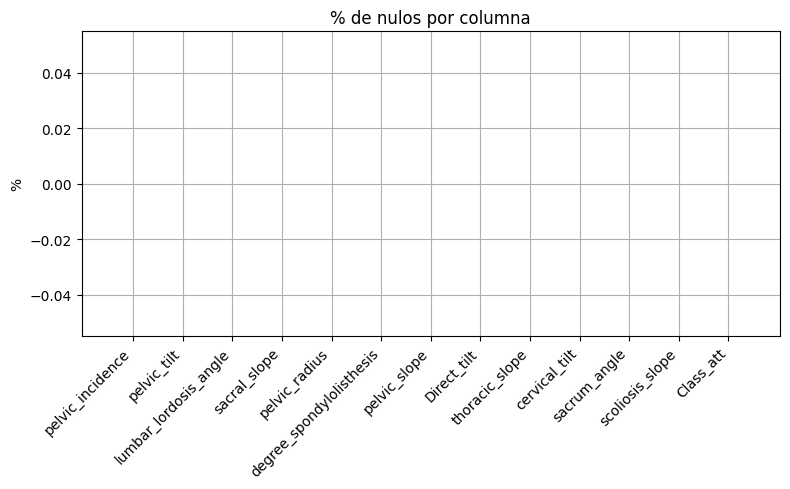

In [7]:
nulls_count = df.isna().sum()
nulls_pct = (df.isna().mean()*100).round(2)
profile_nulls = pd.DataFrame({"nulls": nulls_count, "%_nulls": nulls_pct}).sort_values("%_nulls", ascending=False)
print("Duplicados:", df.duplicated().sum())
display(profile_nulls)

fig, ax = plt.subplots()
ax.bar(profile_nulls.index.astype(str), profile_nulls['%_nulls'])
ax.set_title('% de nulos por columna')
ax.set_ylabel('%')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

,count,mean,std,min,25%,50%,75%,max
pelvic_incidence,310.0,6.049665e+01,1.723652e+01,26.147921,46.430294,58.691038,72.877696,1.298340e+02
pelvic_tilt,310.0,1.754282e+01,1.000833e+01,-6.554948,10.667069,16.357689,22.120395,4.943186e+01
lumbar_lordosis_angle,310.0,8.069529e+06,1.420778e+08,14.000000,37.000000,49.887767,63.011022,2.501538e+09
sacral_slope,310.0,4.295383e+01,1.342310e+01,13.366931,33.347122,42.404912,52.695888,1.214296e+02
pelvic_radius,310.0,1.179207e+02,1.331738e+01,70.082575,110.709196,118.268178,125.467674,1.630710e+02
degree_spondylolisthesis,310.0,2.629669e+01,3.755903e+01,-11.058179,1.603727,11.767934,41.287352,4.185431e+02
pelvic_slope,310.0,4.729793e-01,2.857867e-01,0.003220,0.224367,0.475989,0.704846,9.988267e-01
Direct_tilt,310.0,2.132153e+01,8.639423e+00,7.027000,13.054400,21.907150,28.954075,3.674390e+01
thoracic_slope,310.0,1.306451e+01,3.399713e+00,7.037800,10.417800,12.938450,15.889525,1.932400e+01
cervical_tilt,310.0,1.193332e+01,2.893265e+00,7.030600,9.541140,11.953835,14.371810,1.682108e+01


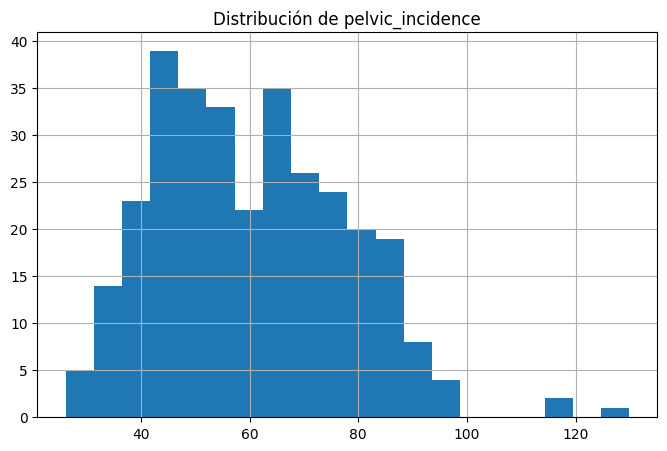

In [9]:
df_conv = df.copy()
desc_num = df_conv.select_dtypes(include=['int64','float64']).describe().T
display(desc_num)

num_cols = df_conv.select_dtypes(include=['int64','float64']).columns.tolist()
if len(num_cols) > 0:
    fig, ax = plt.subplots()
    col0 = num_cols[0]
    ax.hist(df_conv[col0].dropna(), bins=20)
    ax.set_title(f'Distribución de {col0}')
    plt.show()

In [10]:
num = df_conv.select_dtypes(include=['int64','float64'])
if num.shape[1] > 0:
    q1, q3 = num.quantile(0.25), num.quantile(0.75)
    iqr = q3 - q1
    low, high = q1 - 1.5*iqr, q3 + 1.5*iqr
    out_iqr = ~num.apply(lambda s: s.between(low[s.name], high[s.name]))
    out_counts = out_iqr.sum()
    display(pd.DataFrame({'outliers_IQR': out_counts}))

,outliers_IQR
pelvic_incidence,3
pelvic_tilt,13
lumbar_lordosis_angle,2
sacral_slope,1
pelvic_radius,11
degree_spondylolisthesis,10
pelvic_slope,0
Direct_tilt,0
thoracic_slope,0
cervical_tilt,0


In [11]:
cat_cols = df_conv.select_dtypes(include=['category','object']).columns.tolist()
summary = {}
for c in cat_cols:
    vc = df_conv[c].value_counts(dropna=False, normalize=True).mul(100).round(2)
    rare = vc[vc < 5.0]
    summary[c] = {"cardinality": int(df_conv[c].nunique(dropna=False)), "rare_levels_%": rare.to_dict()}
display(pd.DataFrame(summary).T)

,cardinality,rare_levels_%
Class_att,2,{}


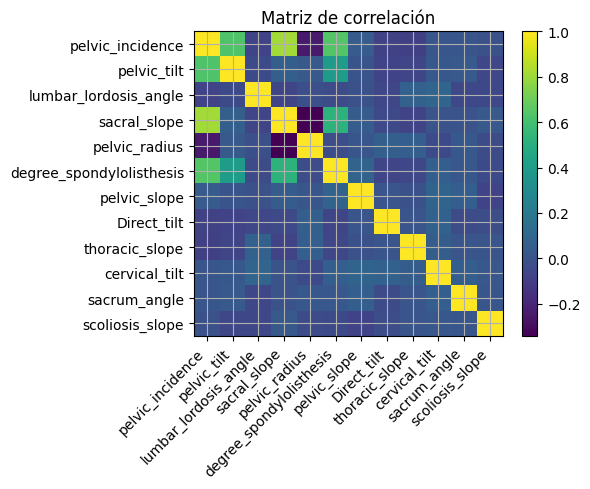

pelvic_incidence       sacral_slope                0.814960
                       degree_spondylolisthesis    0.638743
                       pelvic_tilt                 0.629199
sacral_slope           degree_spondylolisthesis    0.523557
pelvic_tilt            degree_spondylolisthesis    0.397862
sacral_slope           pelvic_radius               0.342128
pelvic_incidence       pelvic_radius               0.247467
lumbar_lordosis_angle  cervical_tilt               0.095546
pelvic_incidence       thoracic_slope              0.089740
pelvic_slope           cervical_tilt               0.088017
dtype: float64

In [12]:
corr = df_conv.select_dtypes(include=['int64','float64']).corr(numeric_only=True)
if corr.shape[0] > 0:
    fig, ax = plt.subplots(figsize=(6,5))
    im = ax.imshow(corr.values, aspect='auto')
    ax.set_xticks(range(len(corr.columns)))
    ax.set_xticklabels(corr.columns, rotation=45, ha='right')
    ax.set_yticks(range(len(corr.columns)))
    ax.set_yticklabels(corr.columns)
    ax.set_title('Matriz de correlación')
    plt.colorbar(im, ax=ax)
    plt.tight_layout(); plt.show()

    corr_abs = corr.abs()
    upper = corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(bool))
    pairs = upper.stack().sort_values(ascending=False)
    display(pairs.head(10))

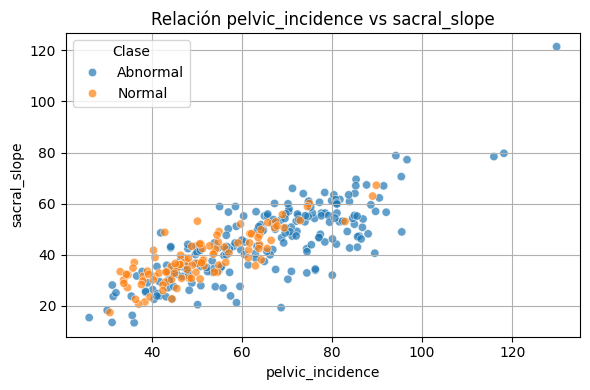

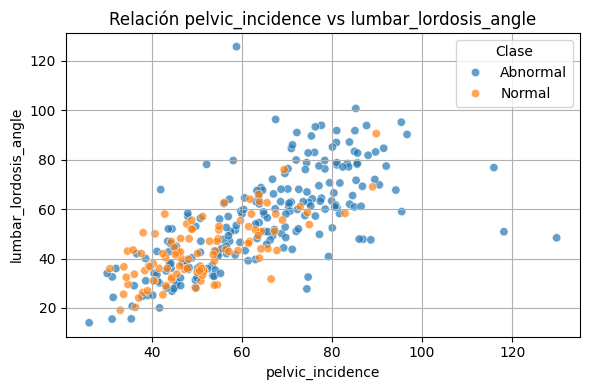

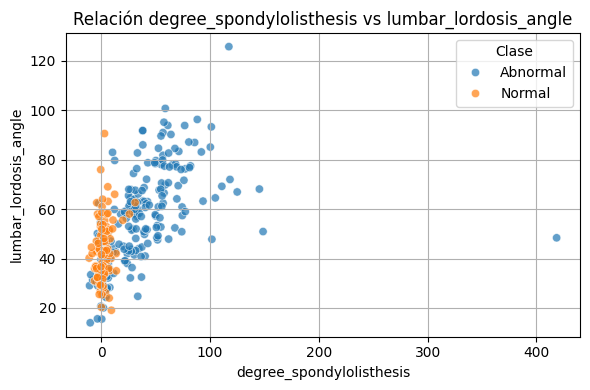

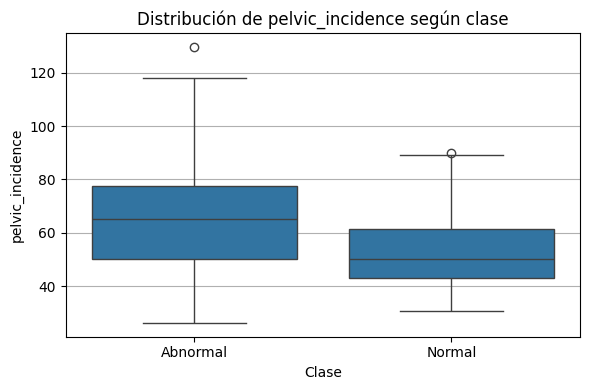

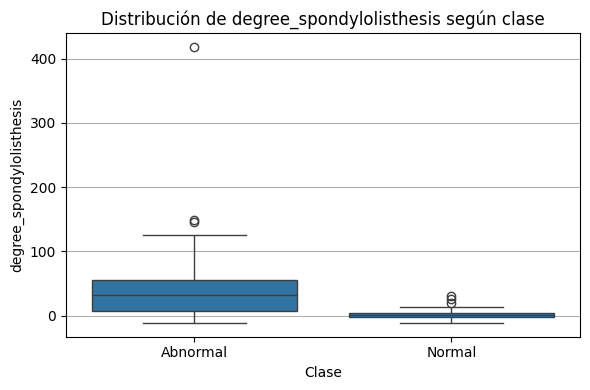

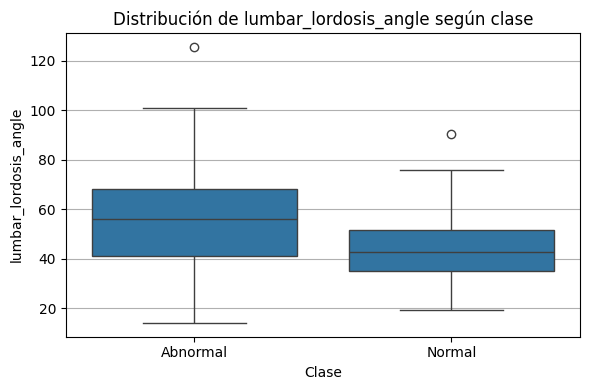

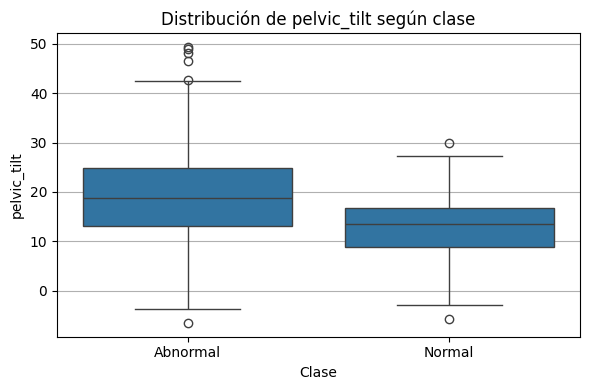

In [ ]:
# Scatter plots de variables numéricas más correlacionadas
scatter_pairs = [
    ('pelvic_incidence', 'sacral_slope'),
    ('pelvic_incidence', 'lumbar_lordosis_angle'),
    ('degree_spondylolisthesis', 'lumbar_lordosis_angle')
]

for x_col, y_col in scatter_pairs:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df_conv[x_col], y=df_conv[y_col], hue=df_conv['Class_att'], alpha=0.7)
    plt.title(f'Relación {x_col} vs {y_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.legend(title='Clase')
    plt.tight_layout()
    plt.show()

# Boxplots de variables numéricas según la clase
boxplot_cols = [
    'pelvic_incidence',
    'degree_spondylolisthesis',
    'lumbar_lordosis_angle',
    'pelvic_tilt'
]

for col in boxplot_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='Class_att', y=col, data=df_conv)
    plt.title(f'Distribución de {col} según clase')
    plt.xlabel('Clase')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Crosstab
cat_cols = df_conv.select_dtypes(include=['category','object']).columns.tolist()
for c in cat_cols:
    if c != 'Class_att':
        ct = pd.crosstab(df_conv['Class_att'], df_conv[c], normalize='index').round(3)
        display(ct)


In [ ]:
from sklearn.model_selection import train_test_split
target_col = 'Class_att'

X = df.drop(columns=[target_col])
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print('Train:', X_train.shape, '| Test:', X_test.shape)

Train: (248, 12) | Test: (62, 12)


In [ ]:
print(df['Class_att'].unique())
print(df['Class_att'].dtype)

['Abnormal' 'Normal']
object


In [ ]:
y_train = y_train.astype(str).str.strip()
y_test  = y_test.astype(str).str.strip()

In [ ]:
y_train = y_train.map({'Normal': 0, 'Abnormal': 1})
y_test  = y_test.map({'Normal': 0, 'Abnormal': 1})

In [ ]:
# Primeros valores
print(y_train.head())
print(y_test.head())

# Distribución de clases
print("Distribución train:")
print(y_train.value_counts())
print("Distribución test:")
print(y_test.value_counts())

81     1
203    1
224    0
122    1
70     1
Name: Class_att, dtype: int64
226    0
21     1
209    1
99     1
50     1
Name: Class_att, dtype: int64
Distribución train:
Class_att
1    168
0     80
Name: count, dtype: int64
Distribución test:
Class_att
1    42
0    20
Name: count, dtype: int64


In [ ]:
FE_train = X_train.copy()
FE_test  = X_test.copy()

FE_train['high_pelvic_radius'] = (FE_train['pelvic_radius'] > 140).astype(int)
FE_test['high_pelvic_radius']  = (FE_test['pelvic_radius'] > 140).astype(int)

FE_train['high_pelvic_tilt'] = (FE_train['pelvic_tilt'] > 30).astype(int)
FE_test['high_pelvic_tilt']  = (FE_test['pelvic_tilt'] > 30).astype(int)

FE_train['high_degree_spondy'] = (FE_train['degree_spondylolisthesis'] > 50).astype(int)
FE_test['high_degree_spondy']  = (FE_test['degree_spondylolisthesis'] > 50).astype(int)

print("Primeras filas de FE_train:")
display(FE_train.head())

print("\nPrimeras filas de FE_test:")
display(FE_test.head())

print("\nDistribución de banderas de outliers en train:")
print(FE_train[['high_pelvic_radius', 'high_pelvic_tilt', 'high_degree_spondy']].sum())

Primeras filas de FE_train:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,high_pelvic_radius,high_pelvic_tilt,high_degree_spondy
81,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,0.406965,10.5895,12.5946,15.87462,-10.624659,31.9699,0,0,1
203,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787,0.198909,30.8752,9.4553,11.84325,-34.729173,26.6740,0,0,0
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,0.379933,9.4868,17.7556,10.98189,-16.891891,28.0900,0,0,0
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,0.099941,20.2822,10.3082,15.89258,-14.156070,39.9730,0,1,1
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0.267292,26.9716,18.3111,13.67428,-19.605044,22.7590,0,0,0



Primeras filas de FE_test:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,high_pelvic_radius,high_pelvic_tilt,high_degree_spondy
226,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,0.134954,31.7659,10.9570,13.32169,-9.939014,31.3141,1,0,0
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561,0.175245,23.0791,14.2195,14.14196,3.780394,24.9278,0,0,0
209,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,0.388445,16.1775,15.0636,13.79474,-8.044644,21.6135,0,0,0
99,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,0.401085,34.6931,10.3564,10.64403,-26.051990,10.4338,0,0,0
50,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,0.680655,16.7110,15.9714,14.37627,4.779509,43.2610,0,0,0



Distribución de banderas de outliers en train:
high_pelvic_radius    11
high_pelvic_tilt      30
high_degree_spondy    54
dtype: int64


In [ ]:
FE_train['pelvic_to_sacral_ratio'] = FE_train['pelvic_incidence'] / FE_train['sacral_slope']
FE_test['pelvic_to_sacral_ratio']  = FE_test['pelvic_incidence'] / FE_test['sacral_slope']

print("Primeras filas de FE_train:")
display(FE_train.head())

print("\nPrimeras filas de FE_test:")
display(FE_test.head())

Primeras filas de FE_train:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,high_pelvic_radius,high_pelvic_tilt,high_degree_spondy,pelvic_to_sacral_ratio
81,74.005541,21.122402,57.379502,52.883139,120.205963,74.555166,0.406965,10.5895,12.5946,15.87462,-10.624659,31.9699,0,0,1,1.399417
203,73.635962,9.711318,63.000000,63.924644,98.727930,26.975787,0.198909,30.8752,9.4553,11.84325,-34.729173,26.6740,0,0,0,1.151918
224,89.834676,22.639217,90.563461,67.195460,100.501192,3.040973,0.379933,9.4868,17.7556,10.98189,-16.891891,28.0900,0,0,0,1.336916
122,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,0.099941,20.2822,10.3082,15.89258,-14.156070,39.9730,0,1,1,2.501920
70,72.560702,17.385191,52.000000,55.175511,119.193724,32.108537,0.267292,26.9716,18.3111,13.67428,-19.605044,22.7590,0,0,0,1.315089



Primeras filas de FE_test:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,high_pelvic_radius,high_pelvic_tilt,high_degree_spondy,pelvic_to_sacral_ratio
226,63.959522,16.060945,63.123736,47.898577,142.360125,6.298971,0.134954,31.7659,10.9570,13.32169,-9.939014,31.3141,1,0,0,1.335312
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561,0.175245,23.0791,14.2195,14.14196,3.780394,24.9278,0,0,0,1.622095
209,48.259920,16.417462,36.329137,31.842457,94.882336,28.343799,0.388445,16.1775,15.0636,13.79474,-8.044644,21.6135,0,0,0,1.515584
99,58.521623,13.922286,41.467855,44.599337,115.514798,30.387984,0.401085,34.6931,10.3564,10.64403,-26.051990,10.4338,0,0,0,1.312164
50,55.285852,20.440118,34.000000,34.845733,115.877017,3.558372,0.680655,16.7110,15.9714,14.37627,4.779509,43.2610,0,0,0,1.586589


In [ ]:
FE_train = FE_train.drop(columns=['sacral_slope'])
FE_test  = FE_test.drop(columns=['sacral_slope'])

print("Columnas restantes en FE_train:")
print(FE_train.columns)

Columnas restantes en FE_train:
Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'pelvic_radius', 'degree_spondylolisthesis', 'pelvic_slope',
       'Direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle',
       'scoliosis_slope', 'high_pelvic_radius', 'high_pelvic_tilt',
       'high_degree_spondy', 'pelvic_to_sacral_ratio'],
      dtype='object')


In [ ]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creación del modelo
rf_model = RandomForestClassifier(
    n_estimators=200,  # número de árboles
    random_state=42,
    max_depth=None,
    min_samples_split=2
)

# Entrenar
rf_model.fit(FE_train, y_train)

# Predecir en test
y_pred = rf_model.predict(FE_test)

# Evaluación
acc = accuracy_score(y_test, y_pred)
cm  = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {acc:.3f}")
print("Matriz de confusión:")
print(cm)
print("Reporte de clasificación:")
print(report)

Accuracy: 0.758
Matriz de confusión:
[[13  7]
 [ 8 34]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.62      0.65      0.63        20
           1       0.83      0.81      0.82        42

    accuracy                           0.76        62
   macro avg       0.72      0.73      0.73        62
weighted avg       0.76      0.76      0.76        62



In [ ]:
# Regresión logística
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score


# Entrenamiento del modelo

lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(FE_train, y_train)

# Predecir en test
y_pred_lr = lr_model.predict(FE_test)
y_prob_lr = lr_model.predict_proba(FE_test)[:,1]  # Probabilidad para ROC-AUC

# Accuracy
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy: {acc_lr:.3f}\n")

# Matriz de confusión
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Matriz de confusión:")
print(cm_lr, "\n")

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(y_test, y_pred_lr))


Accuracy: 0.823

Matriz de confusión:
[[14  6]
 [ 5 37]] 

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.74      0.70      0.72        20
           1       0.86      0.88      0.87        42

    accuracy                           0.82        62
   macro avg       0.80      0.79      0.79        62
weighted avg       0.82      0.82      0.82        62

